# Accessing Collaboratory storage from Python with ebrains_drive

## Installation

In [3]:
!pip install -U ebrains_drive

  Using cached ebrains_drive-0.5.1-py3-none-any.whl (24 kB)
  Attempting uninstall: ebrains_drive
    Found existing installation: ebrains-drive 0.5.0
    Uninstalling ebrains-drive-0.5.0:
      Successfully uninstalled ebrains-drive-0.5.0


## Working with the Drive

In [7]:
from ebrains_drive.client import DriveApiClient

token = "..."
drive_client = DriveApiClient(token=token)

### Get a list of all the repositories (collabs) you have access to:

In [10]:
list_repos =  drive_client.repos.list_repos()
list_repos[:10]

[ebrains_drive.repo.Repo(id='0aaf3c5a-c1f9-422d-b0ee-0bc2f47984cb', name='My Library'),
 ebrains_drive.repo.Repo(id='8c0d8dac-b704-4b28-962e-9499821eb3d5', name='SGA3 T6.10'),
 ebrains_drive.repo.Repo(id='3434102f-045f-4d71-b627-3e1d39a4bf95', name='SP9_SGA2_DeliverablesMilestonesAndReport'),
 ebrains_drive.repo.Repo(id='c43abe57-2fe5-465f-be28-78fde7a5949c', name='INCF'),
 ebrains_drive.repo.Repo(id='9ccd81f6-fbcf-4cbc-815d-1e67d98cd694', name='SP9_SGA2_DeliverablesAndMilestones_ReadOnlyOfSubmittedVersions'),
 ebrains_drive.repo.Repo(id='47995dbc-f576-4008-a76c-eefbfd818529', name='HBP Data Curation - Internal'),
 ebrains_drive.repo.Repo(id='c11f95c0-59fd-428f-b02e-2238566c8499', name='Technical Coordination'),
 ebrains_drive.repo.Repo(id='353e8524-341a-4b55-ac95-a211b9d6b525', name='d-df3c050e-e9fc-4764-8f6e-1015b8cf74e0'),
 ebrains_drive.repo.Repo(id='332057bb-1078-4aaa-9b85-c95da9122428', name='Data sharing collab template'),
 ebrains_drive.repo.Repo(id='851213ea-1024-428f-8fe1-005

### Get information about a specific repository

In [18]:
repo_obj = drive_client.repos.get_repos_by_name("Data Curation")[0]
repo_obj.__dict__

{'client': DriveApiClient[server=https://drive.ebrains.eu, user=None],
 'type': 'grepo',
 'id': 'f5cf4964-f095-49bd-8c34-e4ffda05a497',
 'name': 'Data Curation',
 'groupid': 819,
 'group_name': 'collab-data-curation-administrator',
 'owner': 'collab-data-curation-administrator',
 'mtime': 1693295293,
 'mtime_relative': '<time datetime="2023-08-29T07:48:13" is="relative-time" title="Tue, 29 Aug 2023 07:48:13 +0000" >10 days ago</time>',
 'modifier_email': 'ingvildeb',
 'modifier_name': 'ingvildeb',
 'modifier_contact_email': 'ingvildeb',
 'size': 35897932,
 'encrypted': False,
 'permission': 'rw',
 'root': '',
 'head_commit_id': '8d3d1922a3c583cb64701abd3552c9b48f91ca43',
 'version': 1,
 'share_from': 'platform@humanbrainproject.eu',
 'share_from_name': 'platform',
 'share_from_contact_email': 'platform@humanbrainproject.eu'}

### List repository contents

In [19]:
dir_obj = repo_obj.get_dir('/') # specify dir path; '/' signifies root directory
dir_obj.ls()

[SeafDir[repo=f5cf49, path=/.ipynb_checkpoints, entries=2],
 SeafDir[repo=f5cf49, path=/Example programmatic access, entries=5],
 SeafDir[repo=f5cf49, path=/Example programmatic metadata ingestion, entries=2],
 SeafFile[repo=f5cf49, path=/2170.pdf, size=112862],
 SeafFile[repo=f5cf49, path=/DataOrganisation.zip, size=1285051],
 SeafFile[repo=f5cf49, path=/DataOrganisationNew.zip, size=1082056],
 SeafFile[repo=f5cf49, path=/EBRAINS Data Provision Protocol.pdf, size=128137],
 SeafFile[repo=f5cf49, path=/EBRAINS-Atlas-Integration.pdf, size=7025095],
 SeafFile[repo=f5cf49, path=/EBRAINS-Curation-Researchers-Guide.pdf, size=8224967],
 SeafFile[repo=f5cf49, path=/EBRAINS-Data-Organisation.pdf, size=1664123],
 SeafFile[repo=f5cf49, path=/EBRAINS-Data-Storage.pdf, size=1878183],
 SeafFile[repo=f5cf49, path=/EBRAINS-DataDescriptor_v2.docx, size=441386],
 SeafFile[repo=f5cf49, path=/EBRAINS-DataDescriptor_v3.1.docx, size=56505],
 SeafFile[repo=f5cf49, path=/EBRAINS-DataDescriptor_v3.docx, size=5

### Get information about a file

In [20]:
file_obj = repo_obj.get_file("/EBRAINS-Curation-Researchers-Guide.pdf") # specify file path
file_obj.__dict__

{'client': DriveApiClient[server=https://drive.ebrains.eu, user=None],
 'repo': ebrains_drive.repo.Repo(id='f5cf4964-f095-49bd-8c34-e4ffda05a497', name='Data Curation'),
 'path': '/EBRAINS-Curation-Researchers-Guide.pdf',
 'id': 'e14f18e14380e63952affe3cb5945fbb748e97ea',
 'type': 'file',
 'size': 8224967}

In [21]:
file_obj.get_download_link()

'https://drive.ebrains.eu/seafhttp/files/309e952d-464d-4ee3-923e-f4ffbc14ae5b/EBRAINS-Curation-Researchers-Guide.pdf'

In [22]:
file_obj.get_share_link()

'https://drive.ebrains.eu/f/40fb55b0fe4e46818bbf/'

### Uploading files

In [24]:
my_collab_name = "put the name of your own collab here"
repo_obj = drive_client.repos.get_repos_by_name(my_collab_name)[0]

In [25]:
dir_obj = repo_obj.get_dir('/') # specify dir path; '/' signifies root directory
dir_obj.ls()

[SeafDir[repo=049447, path=/.ipynb_checkpoints, entries=10],
 SeafDir[repo=049447, path=/notebooks, entries=12],
 SeafDir[repo=049447, path=/tmp, entries=6],
 SeafFile[repo=049447, path=/1-intro-to-brian-neurons.ipynb, size=290970],
 SeafFile[repo=049447, path=/BrainScaleS_01_Chain.ipynb, size=503762],
 SeafFile[repo=049447, path=/demo-demo.ipynb, size=16290],
 SeafFile[repo=049447, path=/demo_PyNN_job.py, size=2643],
 SeafFile[repo=049447, path=/PyNN_tutorial (1).ipynb, size=414643],
 SeafFile[repo=049447, path=/PyNN_tutorial.ipynb, size=414643],
 SeafFile[repo=049447, path=/SciUnit_handson.ipynb, size=28039],
 SeafFile[repo=049447, path=/simulation_provenance.ipynb, size=20105],
 SeafFile[repo=049447, path=/SpiNNaker_01_test.ipynb, size=11891],
 SeafFile[repo=049447, path=/Untitled.ipynb, size=2472],
 SeafFile[repo=049447, path=/Untitled1.ipynb, size=72],
 SeafFile[repo=049447, path=/Untitled2.ipynb, size=2629]]

In [27]:
demo_dir = dir_obj.mkdir("ebrains-drive-demo")

In [30]:
with open("test_file.txt", "w") as fp:
    fp.write("1\n2\n3\n")
file_obj = demo_dir.upload_local_file("test_file.txt", overwrite=True)

In [46]:
from urllib.request import urlopen

download_link = file_obj.get_download_link()
with urlopen(download_link) as fp:
    contents = fp.read().decode("utf-8")

In [47]:
print(contents)

1
2
3



## Working with Buckets

In [70]:
from ebrains_drive import BucketApiClient

bucket_client = BucketApiClient(token=token)

### List bucket contents

Note that while the Drive client uses the collab *name* (e.g., "Data Curation"), the Bucket client uses the identifier from the URL (e.g., "data-curation" if the full URL is "https://wiki.ebrains.eu/bin/view/Collabs/data-curation/").

In [71]:
bucket = bucket_client.buckets.get_bucket("data-curation")
list(bucket.ls())

[DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/Metadata/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/Quantification/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/alignmentJsons/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/ilastikOutputs/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/originalImages/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/pointClouds/, size=0],
 DataproxyFile[bucket=data-curation, path=.nesysWorkflowFiles/zippedPyramids/, size=0],
 DataproxyFile[bucket=data-curation, path=ET.PNG, size=489386]]

### Get information about, or download, a file

In [72]:
file_handle = bucket.get_file("ET.PNG")

In [73]:
url = file_handle.get_download_link()
url

'https://object.cscs.ch:443/v1/AUTH_7e4157014a3d4c1f8ffe270b57008fd4/data-curation/ET.PNG'

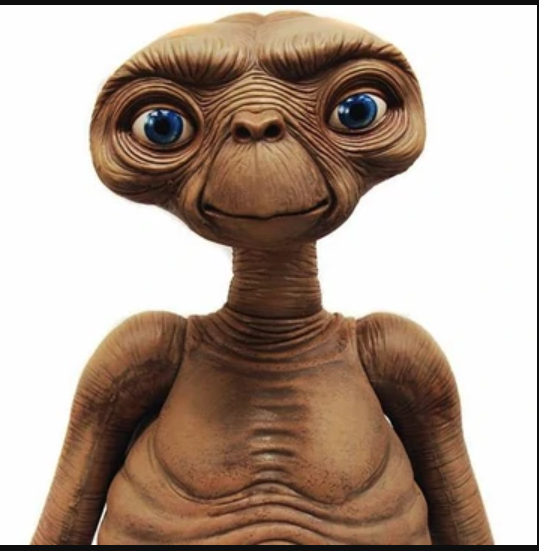

In [74]:
from IPython.display import Image

Image(url)

### Upload a file

In [78]:
my_collab_path = "put-the-path-from-the-url-of-your-own-collab-here"
my_collab_path = "myspace-testing"

my_bucket = bucket_client.buckets.get_bucket(my_collab_path)

# upload new file
from datetime import datetime

my_bucket.upload("test_file.txt", f"test/test_file_{datetime.now().isoformat()}.txt")

# the newly uplaoded file may not be available immediately, so we sleep for a short time
from time import sleep
sleep(1)

# list the contents
files = list(my_bucket.ls(prefix="test"))
files

[DataproxyFile[bucket=myspace-testing, path=test/test_file_2023-09-11T12:11:46.092084.txt, size=6]]